<center>
<h1 style="color:red; font-size:70px;"> Prova di modelli pre-ottimizzazione</h1>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, MaxPooling2D, Conv2D, Dropout, BatchNormalization

In [23]:
trDir = "../Dataset/train"  
valDir = "../Dataset/test"  
datagen = ImageDataGenerator(rescale=1./255)

# Dataset di training
trDat = datagen.flow_from_directory(
    trDir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Dataset di validation
valDat = datagen.flow_from_directory(
    valDir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Full dropout

In [11]:
# Funzione per la costruzione del modello
def buildMod(imW, imH, numcl):

    # Input della rete (immagini sono in scala di grigi)
    model = Sequential()
    model.add(Input(shape=(imW, imH, 1)))

    # Primo filtro convoluzionale
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Secondo filtro convoluzionale
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Terzo filtro convoluzionale
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Parte di classificazione
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numcl, activation = 'softmax'))

    return model


# Creazione effettiva del modello
model = buildMod(48, 48, 7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
histo = model.fit(trDat, validation_data=valDat, epochs=100, batch_size=32, callbacks=[early_stop])

/home/filippo/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 429s 468ms/step - accuracy: 0.2468 - loss: 1.8094 - val_accuracy: 0.3821 - val_loss: 1.6069
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 163s 182ms/step - accuracy: 0.3699 - loss: 1.6090 - val_accuracy: 0.4517 - val_loss: 1.4436
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 163s 182ms/step - accuracy: 0.4181 - loss: 1.4977 - val_accuracy: 0.4653 - val_loss: 1.3916
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 205s 186ms/step - accuracy: 0.4383 - loss: 1.4554 - val_accuracy: 0.4943 - val_loss: 1.3245
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 164s 183ms/step - accuracy: 0.4585 - loss: 1.4100 - val_accuracy: 0.4980 - val_loss: 1.3093
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 186ms/step - accuracy: 0.4740 - loss: 1.3725 - val_accuracy: 0.5124 - val_loss: 1.2791
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 186ms/step - accuracy: 0.4839 - loss: 1.3550 - val_accuracy: 0.5070 - val_loss: 1.2795
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 169s 188ms/step - accuracy: 

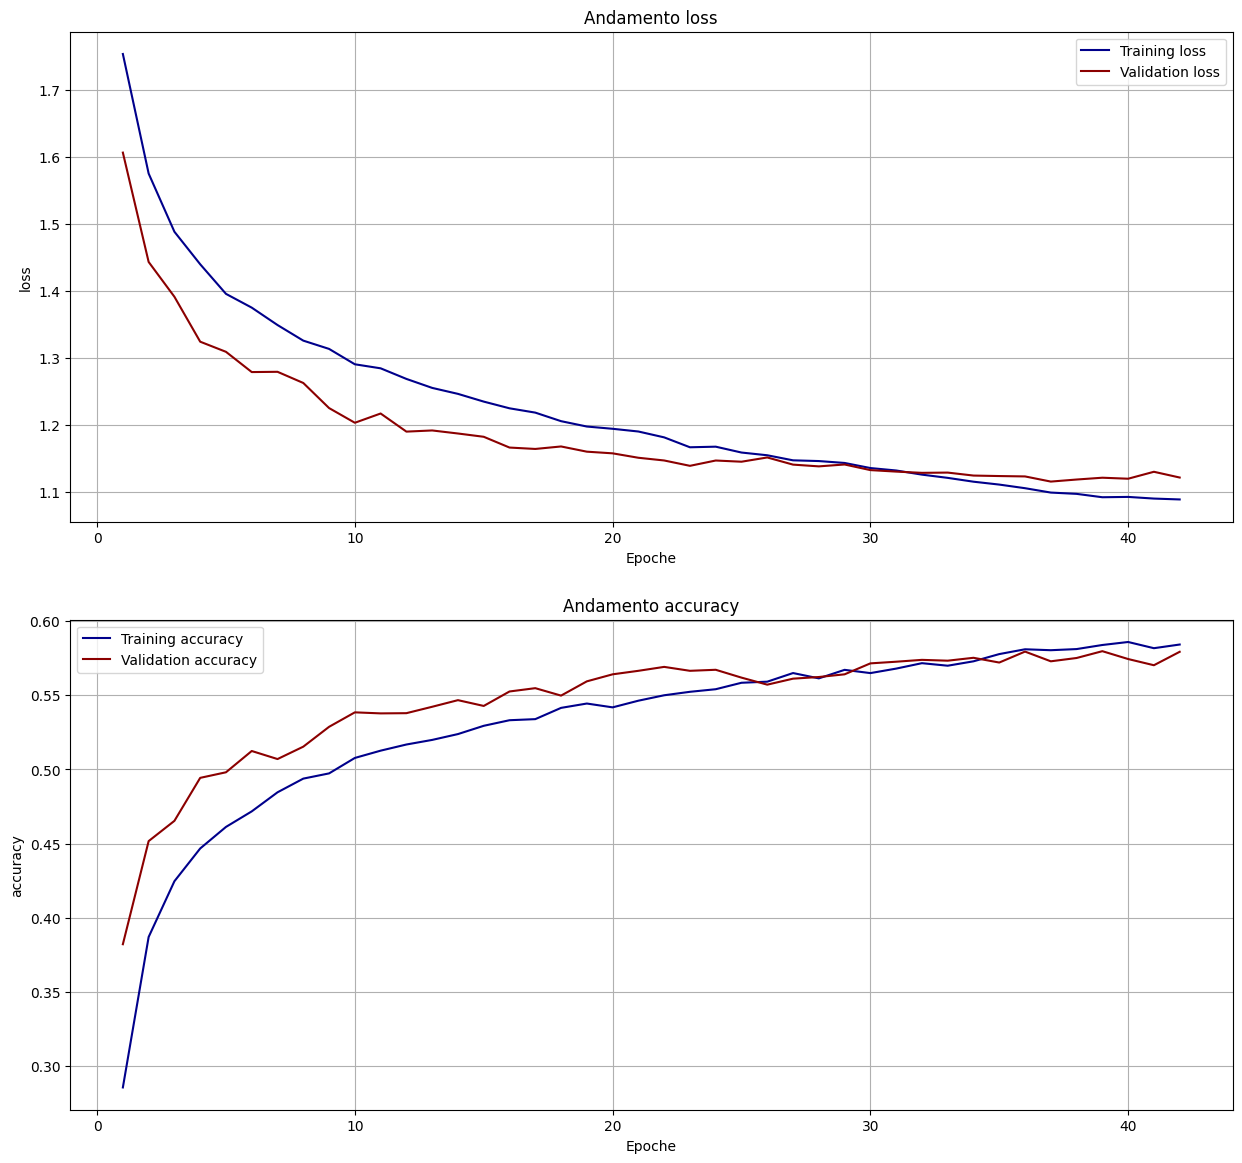

In [13]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()
    
plotTrInfo(histo)
model.save("../Modelli/alldropTry.keras")

## BatchNorm

In [24]:
# Funzione per la costruzione del modello
def buildMod(imW, imH, numcl):

    # Input della rete (immagini sono in scala di grigi)
    model = Sequential()
    model.add(Input(shape=(imW, imH, 1)))

    # Primo filtro convoluzionale
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Secondo filtro convoluzionale
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Terzo filtro convoluzionale
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))

    # Parte di classificazione
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numcl, activation = 'softmax'))

    return model


# Creazione effettiva del modello
model = buildMod(48, 48, 7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
histo = model.fit(trDat, validation_data=valDat, epochs=200, batch_size=32, callbacks=[early_stop])

Epoch 1/200


/home/filippo/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 207s 223ms/step - accuracy: 0.2332 - loss: 2.0294 - val_accuracy: 0.2733 - val_loss: 1.6870
Epoch 2/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 210s 234ms/step - accuracy: 0.2720 - loss: 1.7360 - val_accuracy: 0.2998 - val_loss: 1.6740
Epoch 3/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 260s 232ms/step - accuracy: 0.3127 - loss: 1.6611 - val_accuracy: 0.3984 - val_loss: 1.5291
Epoch 4/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 264s 234ms/step - accuracy: 0.3413 - loss: 1.6240 - val_accuracy: 0.3862 - val_loss: 1.5881
Epoch 5/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 212s 236ms/step - accuracy: 0.3669 - loss: 1.5826 - val_accuracy: 0.4493 - val_loss: 1.4392
Epoch 6/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 213s 238ms/step - accuracy: 0.3863 - loss: 1.5589 - val_accuracy: 0.4478 - val_loss: 1.4211
Epoch 7/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 238ms/step - accuracy: 0.4021 - loss: 1.5116 - val_accuracy: 0.4061 - val_loss: 1.5809
Epoch 8/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 215s 239ms/step - accuracy: 0.4176 - los

KeyboardInterrupt: 

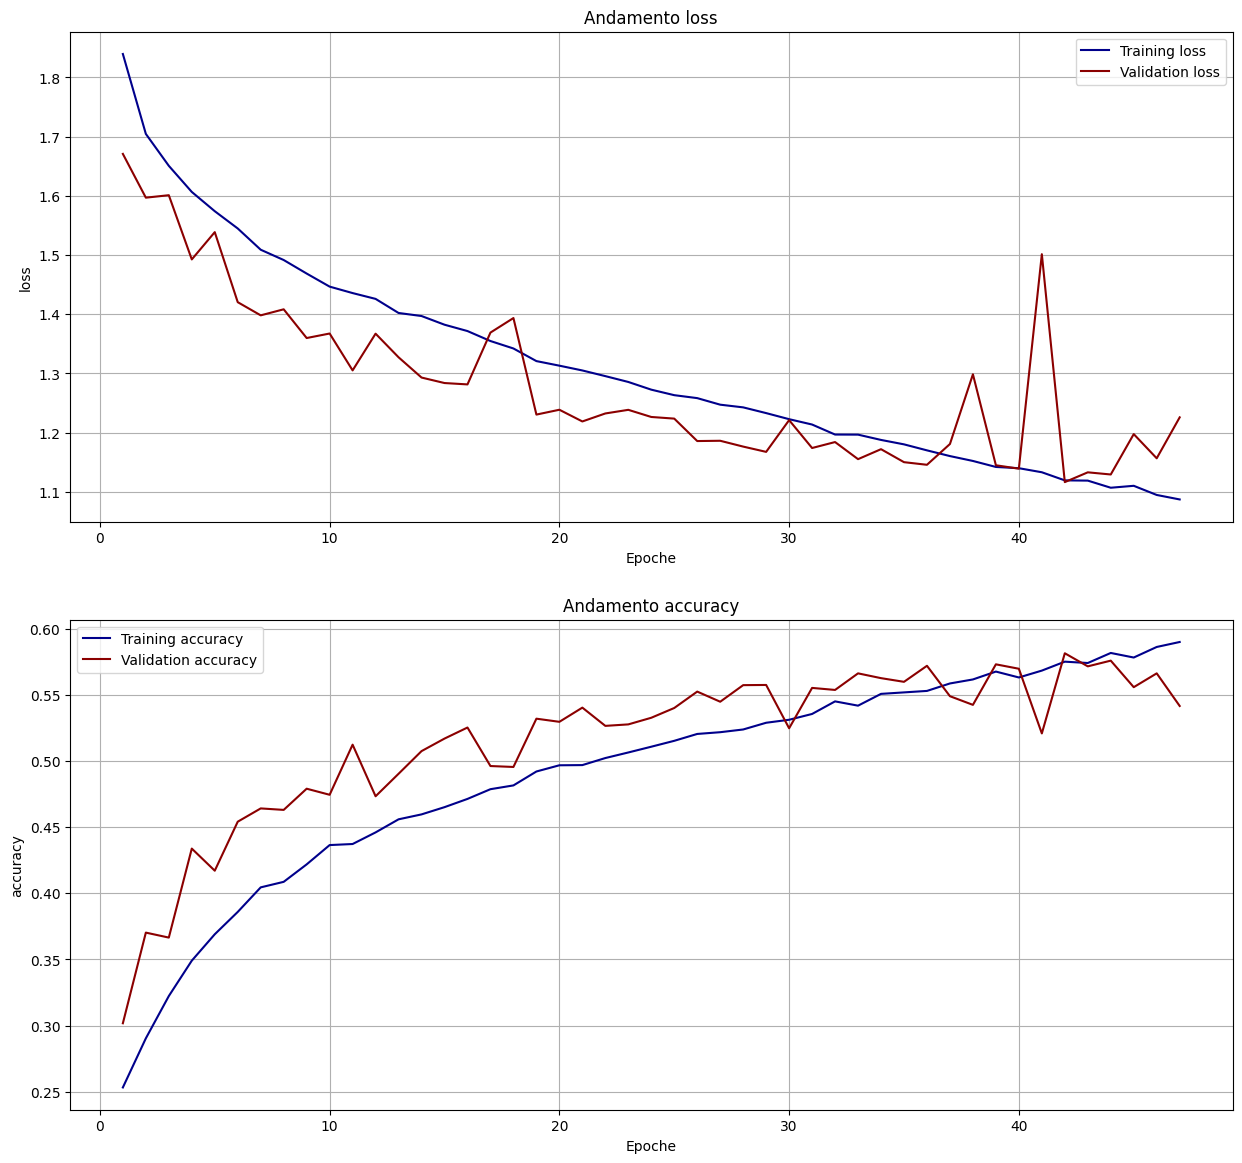

In [21]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()
    
plotTrInfo(histo)
model.save("../Modelli/batchNorm.keras")